In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
print(torch.__version__)

2.1.2


In [11]:
#PLI images of range [0, 1] --> Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


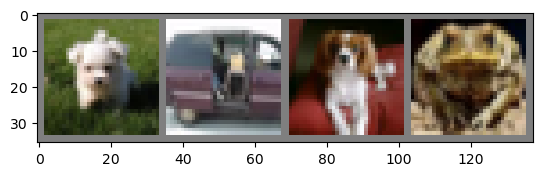

dog   car   dog   frog 


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img /2 + 0.5 #[-1, 1] --> [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [13]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device=device)


cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
loss_history = []
for epoch in range(30):
    running_loss = 0.0
    loss_tmp = 0.0
    for i, data in enumerate(iterable=trainloader, start=0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loss_tmp += loss.item()
        if i % 2000 == 1999:
            print(f'epoch: {epoch+1}, {i+1:5d}, loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_history.append(loss_tmp)

print('Finished Training!')
        

epoch: 1,  2000, loss: 2.223
epoch: 1,  4000, loss: 1.905
epoch: 1,  6000, loss: 1.686
epoch: 1,  8000, loss: 1.605
epoch: 1, 10000, loss: 1.531
epoch: 1, 12000, loss: 1.481
epoch: 2,  2000, loss: 1.416
epoch: 2,  4000, loss: 1.387
epoch: 2,  6000, loss: 1.393
epoch: 2,  8000, loss: 1.357
epoch: 2, 10000, loss: 1.333
epoch: 2, 12000, loss: 1.314
epoch: 3,  2000, loss: 1.271
epoch: 3,  4000, loss: 1.241
epoch: 3,  6000, loss: 1.244
epoch: 3,  8000, loss: 1.234
epoch: 3, 10000, loss: 1.231
epoch: 3, 12000, loss: 1.240
epoch: 4,  2000, loss: 1.137
epoch: 4,  4000, loss: 1.171
epoch: 4,  6000, loss: 1.150
epoch: 4,  8000, loss: 1.159
epoch: 4, 10000, loss: 1.133
epoch: 4, 12000, loss: 1.140
epoch: 5,  2000, loss: 1.075
epoch: 5,  4000, loss: 1.087
epoch: 5,  6000, loss: 1.068
epoch: 5,  8000, loss: 1.101
epoch: 5, 10000, loss: 1.085
epoch: 5, 12000, loss: 1.069
epoch: 6,  2000, loss: 1.001
epoch: 6,  4000, loss: 1.019
epoch: 6,  6000, loss: 1.014
epoch: 6,  8000, loss: 1.044
epoch: 6, 1000

In [17]:
PATH = './cifar_net_30ep.pth'
torch.save(net.state_dict(), PATH)

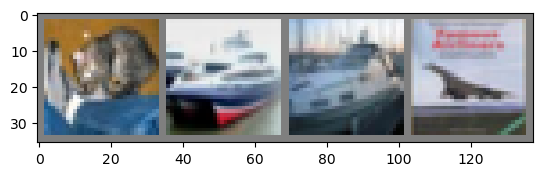

GT:  cat   ship  ship  plane


In [18]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GT: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [19]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [20]:
outputs = net(images)

In [21]:
_, predicted = torch.max(outputs, 1)
print('GT: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

GT:  cat   ship  ship  plane
Predicted:  cat   ship  frog  plane


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Acc of net on 10000 test images: {100*correct // total} %')


Acc of net on 10000 test images: 57 %


In [23]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, predictions in zip(labels, predictions):
            if label == predictions:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_cnt in correct_pred.items():
    acc = 100*float(correct_cnt) / total_pred[classname]
    print(f'Acc for class: {classname:5s} is {acc:.1f} %')


Acc for class: plane is 57.1 %
Acc for class: car   is 66.7 %
Acc for class: bird  is 53.7 %
Acc for class: cat   is 43.2 %
Acc for class: deer  is 43.7 %
Acc for class: dog   is 38.6 %
Acc for class: frog  is 74.3 %
Acc for class: horse is 69.2 %
Acc for class: ship  is 72.9 %
Acc for class: truck is 54.7 %


In [53]:
lh = list(map(lambda x: round(x/12500, 3), loss_history))
print(lh)
ep = list(range(1, 31))
print(ep)

[1.727, 1.366, 1.243, 1.148, 1.08, 1.023, 0.978, 0.935, 0.899, 0.867, 0.846, 0.819, 0.794, 0.774, 0.753, 0.742, 0.731, 0.718, 0.71, 0.695, 0.683, 0.682, 0.677, 0.666, 0.659, 0.657, 0.651, 0.647, 0.647, 0.635]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


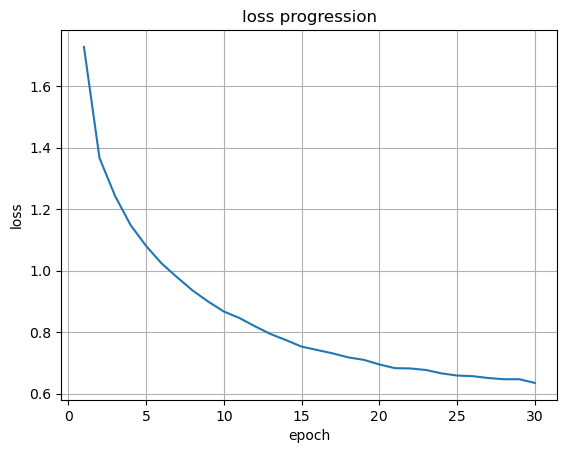

In [55]:
import pandas as pd
df = pd.DataFrame(lh)
plt.plot(ep, df)
plt.title('loss progression')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()